### <font color='blue'>1. Imports</font>

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import lightgbm
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.pyplot import figure
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss, brier_score_loss

In [6]:
path = 'D:\\Meus Documentos\\Python\\Notebooks\\Datascience\\Classification_datascience\\webscrapping\\matches\\rounds\\'
dataset = pd.read_csv('{}combined_csv.csv'.format(path))

In [7]:
dataset = dataset.drop(['bestOF', 'RoundNumber', 'SeriesID', 'MatchID', 'RoundID', 'Spike_1_beep', 'Spike_2_beep'], axis=1)

### <font color='blue'>2. Exploratory analysis</font>

In [8]:
(dataset.corr())["FinalWinner"].sort_values(ascending=False)

FinalWinner     1.000000
ATK_alive       0.363306
ATK_wealth      0.352964
RoundTime       0.005816
Def_has_Odin   -0.066448
DEF_has_OP     -0.118722
DEF_wealth     -0.354381
DEF_alive      -0.370615
Name: FinalWinner, dtype: float64

#### <font color='blue'> Checking for missing values</font>

In [9]:
dataset.isnull().sum()

RoundTime       0
ATK_wealth      0
DEF_wealth      0
ATK_alive       0
DEF_alive       0
DEF_has_OP      0
Def_has_Odin    0
MapName         0
FinalWinner     0
dtype: int64

### <font color='blue'>2.1 Map vs Attack winrate</font>

<AxesSubplot:xlabel='MapName'>

<Figure size 432x288 with 0 Axes>

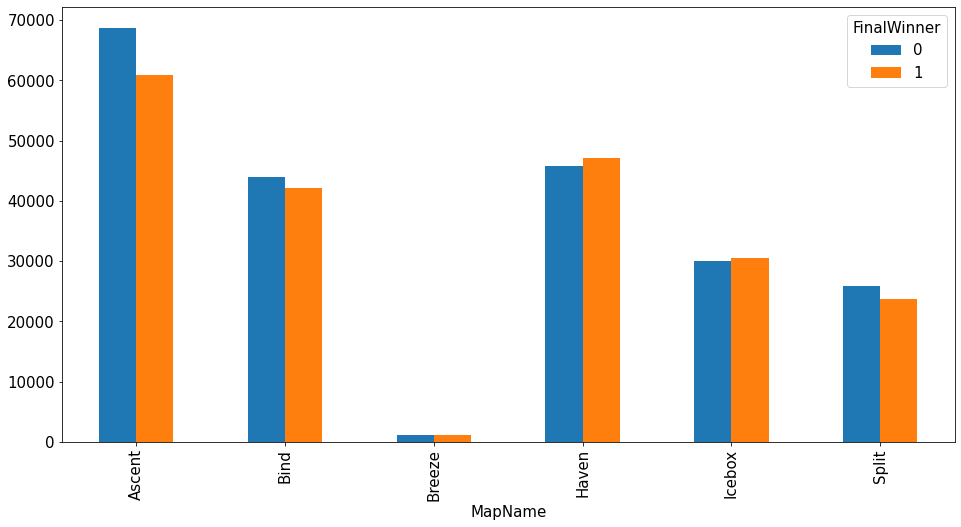

In [16]:
plt.figure()
plt.rcParams.update({'font.size': 15}) # must set in top
pd.crosstab(dataset.MapName,dataset.FinalWinner).plot(kind='bar', figsize=(16,8))

#### <font color='blue'>2.2 Creating dummies</font>

In [17]:
dataset = pd.get_dummies(dataset, columns=['MapName'])

### <font color='blue'>3. Selecting features</font>

In [21]:
X = dataset.drop(['FinalWinner'], axis='columns')
Y = dataset.FinalWinner

In [22]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

dt.fit(X, Y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

In [23]:
feature_column = []
feature_value = []

for i, column in enumerate(X):
    print('The feature importance for {} is {}'.format(column, round(dt.feature_importances_[i]*100, 2)))
    feature_column.append(column)
    feature_value.append(dt.feature_importances_[i])
    
feature_df = pd.DataFrame(zip(feature_column, feature_value), columns=['Feature', 'Feature Importance'])
feature_df = feature_df.sort_values('Feature Importance', ascending = False).reset_index()

The feature importance for RoundTime is 0.89
The feature importance for ATK_wealth is 35.13
The feature importance for DEF_wealth is 21.69
The feature importance for ATK_alive is 21.02
The feature importance for DEF_alive is 21.04
The feature importance for DEF_has_OP is 0.01
The feature importance for Def_has_Odin is 0.02
The feature importance for MapName_Ascent is 0.04
The feature importance for MapName_Bind is 0.02
The feature importance for MapName_Breeze is 0.01
The feature importance for MapName_Haven is 0.05
The feature importance for MapName_Icebox is 0.06
The feature importance for MapName_Split is 0.03


In [24]:
feature_df

,index,Feature,Feature Importance
0,1,ATK_wealth,0.351330
1,2,DEF_wealth,0.216882
2,4,DEF_alive,0.210360
3,3,ATK_alive,0.210191
4,0,RoundTime,0.008907
5,11,MapName_Icebox,0.000583
6,10,MapName_Haven,0.000454
7,7,MapName_Ascent,0.000435
8,12,MapName_Split,0.000252
9,8,MapName_Bind,0.000228


### <font color='blue'>4. Using selected features</font>

In [26]:
feature_df['Feature']

0         ATK_wealth
1         DEF_wealth
2          DEF_alive
3          ATK_alive
4          RoundTime
5     MapName_Icebox
6      MapName_Haven
7     MapName_Ascent
8      MapName_Split
9       MapName_Bind
10      Def_has_Odin
11    MapName_Breeze
12        DEF_has_OP
Name: Feature, dtype: object

### <font color='blue'>5. Splitting train and test</font>

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=15)

In [28]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, train_size=0.9, test_size=0.1, random_state=15)

Text(0.5, 0, 'train')

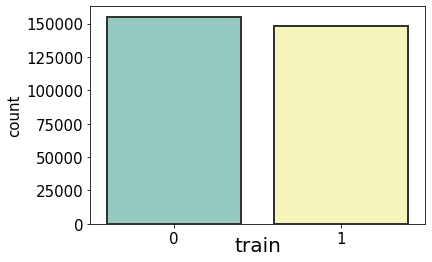

In [29]:
ax = sns.countplot(x=Y_train, palette='Set3', linewidth=2.0, edgecolor=".2", zorder=3)
plt.xlabel('train', fontsize=20, labelpad=-10)

Text(0.5, 0, 'test')

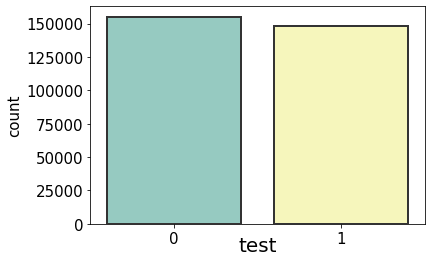

In [30]:
ax = sns.countplot(x=Y_train, palette='Set3', linewidth=2.0, edgecolor=".2", zorder=3)
plt.xlabel('test', fontsize=20, labelpad=-10)

### <font color='blue'>6. Logistic Regression</font>

In [31]:
log_reg = LogisticRegression(C=0.91, random_state=15, solver = 'liblinear')
log_reg.fit(X_train, Y_train)

LogisticRegression(C=0.91, random_state=15, solver='liblinear')

### <font color='blue'>7. Decision Tree</font>

In [32]:
tree = DecisionTreeClassifier(criterion="entropy", max_features=8, max_depth=88).fit(X_train, Y_train)
tree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=88, max_features=8)

### <font color='blue'>8. KNN</font>

In [33]:
knn = KNeighborsClassifier(n_neighbors=2, p=8)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=2, p=8)

### <font color='blue'>9. Light BGM</font>

In [34]:
LGBM = lightgbm.LGBMClassifier()
LGBM.fit(X_train, Y_train)

LGBMClassifier()

#### <font color='green'>Evaluating model </font>

### <font color='blue'>Code for metric analytics </font>

In [35]:
def get_model_metrics(func, data_table:dict):    
    x_train = data_table['x_train']
    y_train = data_table['y_train']
    x_test = data_table['x_test']
    y_test = data_table['y_test']
    
    metric_dict = {}
    train_accuracy = func.score(x_train, y_train)
    test_accuracy = func.score(x_test, y_test)

    metric_dict["train_accuracy"] = train_accuracy
    metric_dict["test_accuracy"] = test_accuracy
    
    Y_pred = func.predict(x_train)
    pred_proba = func.predict_proba(X_train)
    pred_proba_test = func.predict_proba(X_test)
    
    cm = confusion_matrix(y_train, Y_pred)
    metric_dict["confusion_matrix"] = cm

    pred_proba_test = func.predict_proba(x_test)
    metric_dict["log_loss_train"] = log_loss(y_train, pred_proba)
    metric_dict["log_loss_test"] = log_loss(y_test, pred_proba_test)

    metric_dict["brier_score_train"] = brier_score_loss(y_train, pd.DataFrame(pred_proba)[0])
    metric_dict["brier_score_test"] = brier_score_loss(y_test, pd.DataFrame(pred_proba_test)[0])
    
    return metric_dict

### <font color='blue'>Parameters </font>

In [36]:
dataset_dict = {"x_train": X_train, "y_train": Y_train, "x_test": X_test, "y_test": Y_test}

model_list = [log_reg, tree, knn, LGBM]
metrics_list = [get_model_metrics(i, dataset_dict) for i in model_list]
model_names = ["Logistic regression", "Decision Tree", "K-neighbours", "LGBM"]

# <font color='blue'>MODEL PRECISION </font>

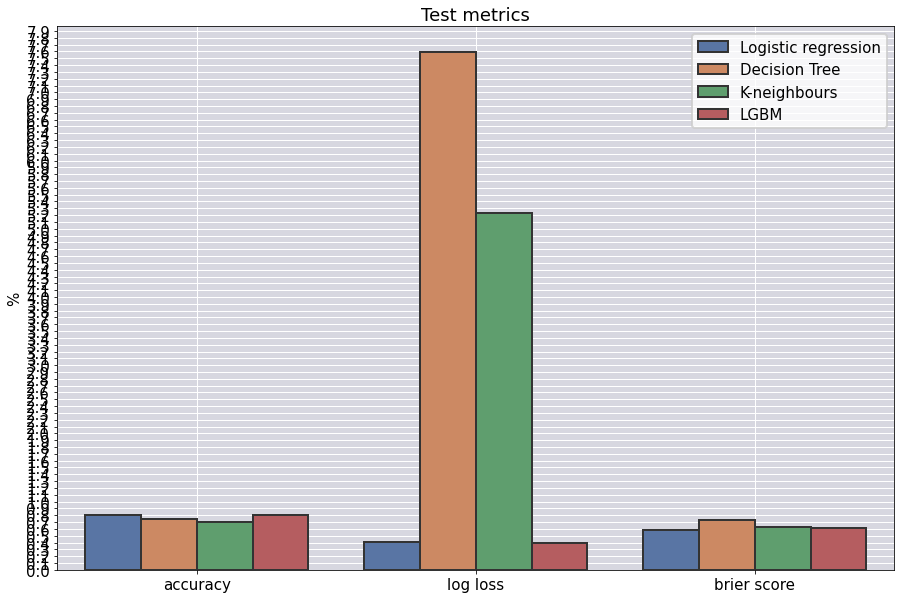

In [37]:
plt.figure(figsize = (15,10))

mn = model_names
gmt = ["accuracy", "log loss", "brier score"]

d = {
    'x':    [gmt[0], gmt[0],  gmt[0], gmt[0],
             gmt[1], gmt[1], gmt[1], gmt[1],
             gmt[2], gmt[2], gmt[2], gmt[2]],
    
    'y':    [metrics_list[0]["test_accuracy"], metrics_list[1]["test_accuracy"], metrics_list[2]["test_accuracy"], metrics_list[3]["test_accuracy"],
             metrics_list[0]["log_loss_test"], metrics_list[1]["log_loss_test"], metrics_list[2]["log_loss_test"], metrics_list[3]["log_loss_test"],
             metrics_list[0]["brier_score_test"], metrics_list[1]["brier_score_test"], metrics_list[2]["brier_score_test"], metrics_list[3]["brier_score_test"]],
    
    'group':[mn[0], mn[1], mn[2], mn[3],
             mn[0], mn[1], mn[2], mn[3],
             mn[0], mn[1], mn[2], mn[3]]
}

sns.set_context(rc = {'patch.linewidth': 2.0})
ax = sns.barplot(x='x', y='y', hue="group", data=d, linewidth=2.0, edgecolor=".2", zorder=3, palette=sns.color_palette("deep"))

plt.ylabel('%')
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(.1))

ax.grid(linewidth=1, color='white', zorder=0)
ax.set_facecolor("#d7d7e0")
plt.title("Test metrics")
plt.show()

# <font color='blue'>OVERFITTING </font>

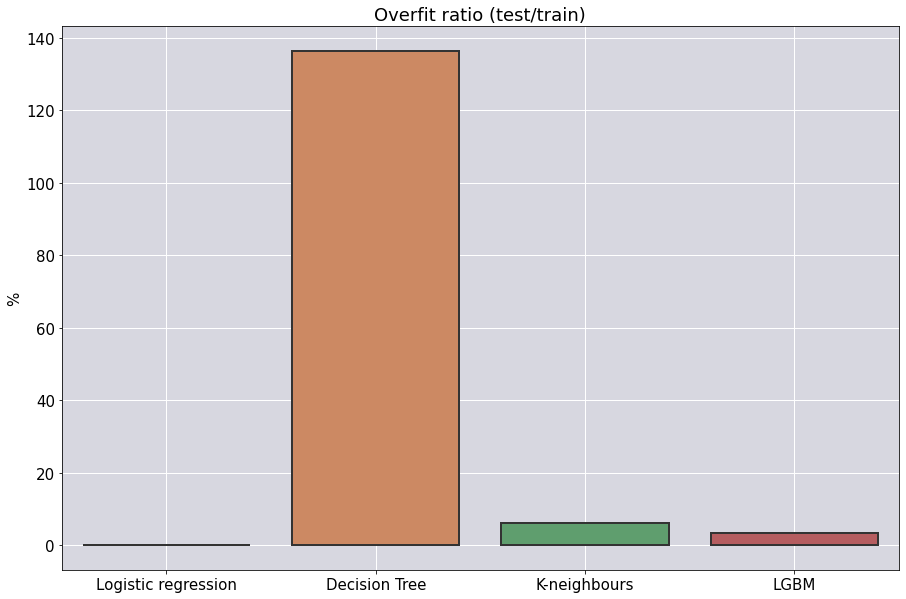

In [38]:
dict(zip(model_names, metrics_list))

overfit_dict = {}

for i in zip(model_names, metrics_list):
    aux = ((i[1]["log_loss_test"] - i[1]["log_loss_train"]) / i[1]["log_loss_train"])
    overfit_dict[i[0]] = str(aux)

keys = list(overfit_dict.keys())
vals = [float(overfit_dict[k][:-1]) for k in keys]
overfit_dict

plt.figure(figsize = (15,10))

sns.set_context(rc = {'patch.linewidth': 1.0})
ax = sns.barplot(x=keys, y=vals, linewidth=2.0, edgecolor=".2", zorder=3, palette=sns.color_palette("deep"))

plt.ylabel('%')
ax.grid(linewidth=1, color='white', zorder=0)
ax.set_facecolor("#d7d7e0")
plt.title("Overfit ratio (test/train)")
plt.show()

# <font color='blue'>CONFUSION MATRIX </font>

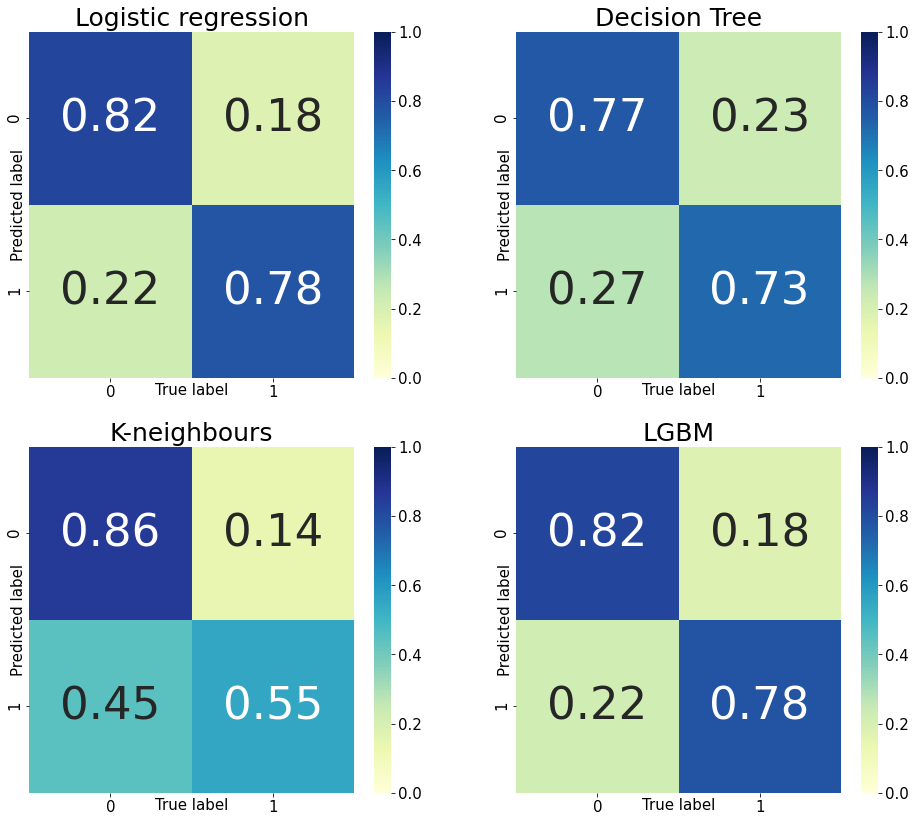

In [39]:
plt.figure(figsize = (16,14))

model_names_size = 25

cm_list = [confusion_matrix(Y_test, func.predict(X_test)) for func in model_list]
cm_list = [(cm/cm.sum(axis=1).reshape(-1,1)) for cm in cm_list]

ax1 = plt.subplot(2,2,1)
sns.heatmap(cm_list[0], cmap="YlGnBu", vmin=0., vmax=1., annot=True, annot_kws={'size':45})
plt.title(model_names[0], fontsize = model_names_size)
plt.ylabel('Predicted label')
plt.xlabel('True label')
ax1.xaxis.set_label_coords(0.5, -0.015)
ax1.yaxis.set_label_coords(-0.01, 0.5)

ax2 = plt.subplot(2,2,2)
sns.heatmap(cm_list[1], cmap="YlGnBu", vmin=0., vmax=1., annot=True, annot_kws={'size':45})
plt.title(model_names[1], fontsize = model_names_size)
plt.ylabel('Predicted label')
plt.xlabel('True label')
ax2.xaxis.set_label_coords(0.5, -0.015)
ax2.yaxis.set_label_coords(-0.01, 0.5)

ax3 = plt.subplot(2,2,3)
sns.heatmap(cm_list[2], cmap="YlGnBu", vmin=0., vmax=1., annot=True, annot_kws={'size':45})
plt.title(model_names[2], fontsize = model_names_size)
plt.ylabel('Predicted label')
plt.xlabel('True label')
ax3.xaxis.set_label_coords(0.5, -0.015)
ax3.yaxis.set_label_coords(-0.01, 0.5)

ax4 = plt.subplot(2,2,4)
sns.heatmap(cm_list[3], cmap="YlGnBu", vmin=0., vmax=1., annot=True, annot_kws={'size':45})
plt.title(model_names[3], fontsize = model_names_size)
plt.ylabel('Predicted label')
plt.xlabel('True label')
ax4.xaxis.set_label_coords(0.5, -0.015)
ax4.yaxis.set_label_coords(-0.01, 0.5)